<a href="https://colab.research.google.com/github/jobenil/series_temporais_ibovespa/blob/main/IC_SeriesTemporais_ProjFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de séries temporais da IBOVESPA (^BVSP)

### Projeto de Introdução à Computação
### Professor: Marcelo Akira

|**Autores** :                 |**e-mail**  :                  |
|------------------------------|-------------------------------|
|Beatriz Moraes                |beatriz_moraes@discente.ufg.br |
|Enzo Longuini                 |enzo.longuini@discente.ufg.br  |
|Eveny Maria Souza Santos      |evenysantos@discente.ufg.br    |
|Jobenil Luiz Magalhães Júnior |magalhaes23@discente.ufg.br    |
|Kauan Pacheco Feris           |kauan23@discente.ufg.br        |


#  <a name="resumo"> RESUMO </a>
[Voltar ao índice](#indice)

O presente trabalho teve como objetivo apresentar diferentes técnicas de ajustamento de séries temporais, implementando-os na linguagem Python e usando como dados de exemplos, os valores de fechamento das ações da Petrobras comercializadas na Bolsa de Valores do Estado de São Paulo entre Janeiro de 2022 até o final de Julho de 2023. Procurou-se verificar ainda a qualidade dos ajustamentos empregando o MAPE. Por fim foi implementado um modelo de análise dos retornos com vistas a demonstrar sua utilidade para a análise de séries temporais.  

#  <a name="indice">  Índice </a>

* [Resumo](#resumo)
* [Índice](#indice)
* [Seção 1 - Introdução](#secao_1)
* [Seção 2 - Origem e obtenção dos dados](#secao_2)
* [Seção 3 - Metodologia do MAPE](#secao_3)
* [Seção 4 - Ajustamento da série temporal empregando Regressão Linear](#secao_4)
* [Seção 5 - Análise dos Retornos da série temporal](#secao_5)
* [Seção 6 - Ajustamento da série temporal empregando Média Móvel](#secao_6)
* [Se￧￣o 7 - Ajustamento da s￩rie temporal empregando M￩dia M￳vel Ponderada](#secao_7)
* [Se￧￣o 8 - Ajustamento da s￩rie temporal empregando Splines](#secao_8)
* [Se￧￣o 9 - Ajustamento da s￩rie temporal empregando Suaviza￧￣o Exponencial Simples](#secao_9)
* [Conclusão](#conclusao)

#  <a name="secao_1"> Se￧￣o 1 - Introdu￧￣o </a>
[Voltar ao índice](#indice)

Já nos antigos reinos do [Egito e da Babil￴ônia](http://www.juventudect.fiocruz.br/estatistica) encontramos relatos de fatos naturais e sociais sendo registrados em papiros e tabuas de argila. Esses reinos tinham interesse de manter registros sobre a sua produção agrícola, arrecadação de impostos e no caso do Egito, as áreas irrigadas anualmente pelo rio Nilo.
Nos dias atuais, uma série infinita de registros históricos são realizados por governos, empresas, universidades e pesquisadores com vistas a aplicações diversas. Governos têm interesses em registrar sua população, a produção agrícola e industrial ou se o nível de gastos com saúde, segurança e educação estão trazendo efeitos positivos para suas populações. Empresas tem interesse em observar suas receitas, gastos e lucro. Instituições de pesquisa tem interesse em manter registros sobre precipitação de chuvas ou temperatura do ambiente.

A análise de séries temporais tem uma longa história e suas origens remontam ao século XVII. O crédito geralmente é dado ao matemático e astrônomo inglês [John Graunt](https://pt.wikipedia.org/wiki/John_Graunt), que em 1662 publicou um trabalho chamado "Natural and Political Observations Made upon the Bills of Mortality". Nesse estudo, ele analisou registros de mortalidade em Londres ao longo do tempo, apresentando o primeiro exemplo conhecido de análise de séries temporais. Graunt usou os registros de óbitos de Londres, que eram publicados regularmente, conhecidos como "Bills of Mortality". Esses registros continham informações sobre as causas de morte, sexo, idade e localização dos indivíduos falecidos em diferentes períodos de tempo. Graunt analisou esses dados para entender melhor os padrões de mortalidade na cidade e identificar possíveis fatores que pudessem influenciar as taxas de mortalidade. A partir do trabalho pioneiro de Graunt, a análise de séries temporais se desenvolveu ao longo dos séculos, tornando-se uma área importante em estatística e econometria e outras disciplinas que lidam com dados sequenciais no tempo. Hoje em dia, a análise de séries temporais é amplamente aplicada em áreas, como finanças, ciências sociais, meteorologia, engenharia e muitas outras, sendo uma ferramenta essencial para extrair informações valiosas de dados temporais.

Uma s￩rie temporal ￩ um conjunto ordenado de observa￧￵es sobre um fen￴meno, numa escala de intervalos. Esse tipo de s￩rie n￣o se limita ao tempo mas tamb￩m ao espa￧o desde que tenhamos em cada instante uma informa￧￣o, podemos dizer a distribui￧￣o dos pontos ￩ cont￭nua.
De um modo geral, uma s￩rie ￩ formada por 3 componentes: tend￪ncia, cicl￭ca e aleat￳ria, cujos componentes podem ser aditivas ou multiplicativas. Abaixo apresentamos a configura￧￣o do modelo aditivo.
$$z(t) = h(t) + c(t) + a(t)$$
Os tratamentos aplicados por especialistas constituem-se de t￩cnicas para diferenciar e minimizar tais efeitos. Nesse trabalho iremos apresentar algumas t￩cnicas de ajustamento, muitas das quais permitem realizar previs￵es para dados futuros. Na sequencia abaixo apresentaremos algumas delas, suas caracter￭sticas gerais, vantagens e desvantagens. Em seguida apresentaremos sua implementa￧￣o e aplica￧￣o para dados obtidos de observa￧￵es da bolsa de valores brasileira.

### Fases do Projeto

Nesse específico projeto iremos implementar 5 modelos de de ajustamento de séries temporais (linear, média móvel, média móvel ponderada, ajustamento por splines cúbica e ajustamento exponencial simples). Além disso apresentaremos um método para análise do retorno. Para os cinco primeiros iremos realizar as seguintes tarefas:

1. Implementação do modelo.
2. Teste do modelo no conjunto de dados selecionado.
3. Representação gráfica contendo os dados reais e os dados ajustados.
4. Verificação da qualidade do modelo através do cálculo do MAPE (Mean Absolute Percentage Error) segundo a fórmula abaixo:

$$MAPE = \frac{100%}{n}\sum_{t=1}^{n}|\frac{A_t - F_t}{A_t}|$$

onde,
$A_t$ é o valor do tempo $t$ e $F_t$ é o valor calculado pelo modelo no mesmo tempo. Quanto menor for o valor encontrado melhor terá sido a modelagem.


#  <a name="secao_2"> Seção 2 - Origem e obtenção dos dados </a>
[Voltar ao índice](#indice)

Empregaremos a base de dados disponibilizada pelo [Yahoo Finance](https://br.financas.yahoo.com/quote/%5EBVSP/history?p=%5EBVSP). Iremos fixar uma variação temporal de um ano e meio (cerca de 390 observações) o que permitirá observar possíveis variações cíclicas se estiverem caracterizadas nos dados. Selecionaremos os papeis de uma empresa listadas na [B3](https://www.b3.com.br/pt_br/produtos-e-servicos/negociacao/renda-variavel/empresas-listadas.htm).
O Portal Yahoo mantém em suas páginas atualizações diárias dos diversos preços práticados por distintos papeis comercializados nas principais Bolsas de Valores do Mundo. A [yfinance](https://pypi.org/project/yfinance/) é uma biblioteca *open-source* mantida pela PyPA (Python Packaging Authority) que agrega as informações mantidas pelo Yahoo Finance.

In [ ]:
import yfinance as yf # Biblioteca a ser utilizada para a obtenção dos dados a serem analisados.
ptr = yf.Ticker("PETR4F.SA")
ptr.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 30.22,
 'open': 30.22,
 'dayLow': 30.17,
 'dayHigh': 30.72,
 'regularMarketPreviousClose': 30.22,
 'regularMarketOpen': 30.22,
 'regularMarketDayLow': 30.17,
 'regularMarketDayHigh': 30.72,
 'volume': 66674,
 'regularMarketVolume': 66674,
 'bid': 30.48,
 'ask': 30.49,
 'fiftyTwoWeekLow': 30.17,
 'fiftyTwoWeekHigh': 30.72,
 'currency': 'BRL',
 'exchange': 'SAO',
 'quoteType': 'EQUITY',
 'symbol': 'PETR4F.SA',
 'underlyingSymbol': 'PETR4F.SA',
 'shortName': 'PETROBRAS   PN      N2',
 'timeZoneFullName': 'America/Sao_Paulo',
 'timeZoneShortName': 'BRT',
 'uuid': 'd69578d9-5873-3b1e-9fee-982e5a4b35e0',
 'gmtOffSetMilliseconds': -10800000,
 'trailingPegRatio': None}

In [ ]:
dados = yf.download("PETR4.SA", period = '1d', start="2022-01-01", end="2023-07-31")
dados.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,28.540001,29.219999,28.530001,29.090000,14.200678,52704700
2022-01-04,29.160000,29.400000,28.910000,29.200001,14.254376,51739200
2022-01-05,29.190001,29.270000,27.940001,28.070000,13.702751,78459800
2022-01-06,28.290001,28.650000,27.840000,28.049999,13.692988,61163100
2022-01-07,28.110001,28.290001,27.820000,28.180000,13.756451,47507600


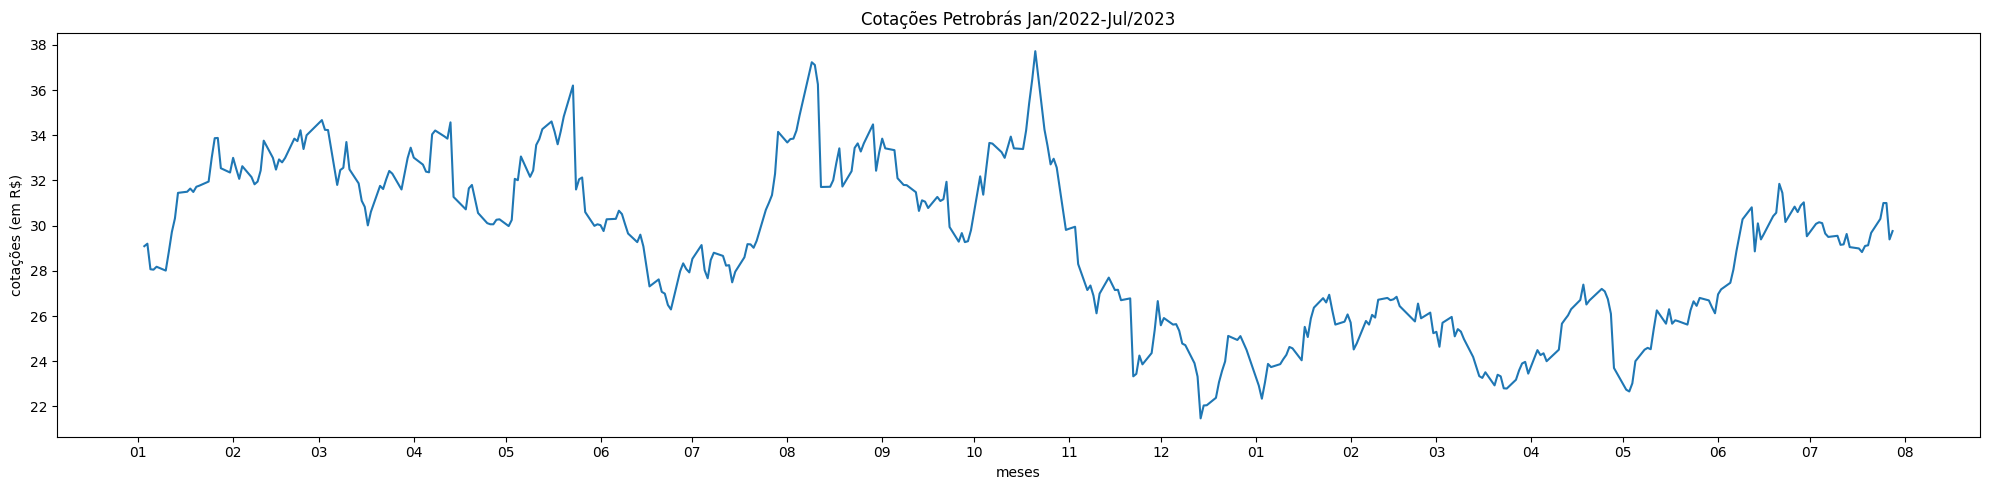

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
formato = mdates.DateFormatter("%m") ### formatando os dados
local = mdates.MonthLocator() ### localizando os meses

fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.xaxis.set_major_formatter(formato)
ax.xaxis.set_major_locator(local)
plt.plot(dados["Close"])
plt.title('Cotações Petrobrás Jan/2022-Jul/2023')
plt.xlabel('meses')
plt.ylabel('cotações (em R$)')
plt.tight_layout()
plt.show()

#  <a name="secao_3"> Seção 3 - Metodologia do MAPE </a>
[Voltar ao índice](#indice)

O [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) (Mean Absolute Percentage Error), em português "Erro Médio Percentual Absoluto", é uma métrica comumente utilizada para avaliar a precisão de previsões ou ajustamentos em séries temporais ou dados de previsão. Ele mede a porcentagem média dos erros absolutos entre os valores reais e previstos em relação aos valores reais. Quanto menor o valor do MAPE, melhor a precisão das previsões.

A fórmula do MAPE é representada da seguinte forma:

$$ MAPE = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{A_{i} - F_{i}}{A_{i}} \right| $$


$A_{i}$ é o valor real observado na posição ${i}$

$F_{i}$ é o valor previsto ou ajustado na posição ${i}$

${n}$ é o número total de observações (ou pontos de dados).

###Vantagens do MAPE:

*   Interpretação Intuitiva: O MAPE é fácil de interpretar, pois expressa o erro médio como uma porcentagem dos valores reais;

*   Sensibilidade Equitativa: O MAPE considera erros proporcionais em relação aos valores reais, o que garante que pequenos e grandes valores sejam tratados de maneira equitativa;

*   Fácil Implementação:O cálculo do MAPE é direto e pode ser implementado rapidamente em linguagens de programação.

###Desvantagens do MAPE:

*   Suscetibilidade a Zeros:O MAPE não é definido quando os valores reais são zero, o que pode limitar sua aplicabilidade em cenários onde valores nulos são comuns;

*   Infinidade para Erros Perfeitos: Se o erro absoluto for zero para algum ponto, o MAPE se tornará infinito;

*   Sensibilidade a Outliers:O MAPE não lida bem com valores extremos (outliers), pois a métrica é calculada em termos de porcentagem.

Em resumo, o MAPE é uma métrica útil para avaliar a precisão de previsões ou ajustamentos, mas também possui limitações que devem ser consideradas ao interpretar seus resultados. É importante escolher métricas de avaliação com base nas características específicas do problema e nas necessidades do projeto.

### Implementação:

In [ ]:
import math

def calculo_mape(real, previsao):
    if len(real) != len(previsao):
        raise ValueError("As listas de entrada devem ter o mesmo comprimento.")

    erros_absolutos = []
    erros_percentuais = []

    for a, f in zip(real, previsao):
        if not math.isnan(a) and not math.isnan(f):
            erros_absolutos.append(abs(a - f))
            if a != 0:
                erros_percentuais.append((abs(a - f) / a) * 100)

    if not erros_percentuais:  # Para o caso de não haver valores válidos para calcular o MAPE
        print("Não foi possível calcular o MAPE, pois todos os valores válidos são NaN.")
        return None

    erro_percentual_medio = sum(erros_percentuais) / len(erros_percentuais)
    print(f'MAPE = {erro_percentual_medio:.2f} %')
    return erro_percentual_medio



#  <a name="secao_4"> Seção 4 - Ajustamento da série temporal empregando Regressão Linear </a>
[Voltar ao índice](#indice)

#Regressão Linear em series temporais

Regressão linear utilizada em series temporais principalmente para o mercado financeiro, ajuda principalmente na decisão de apoio em empresas de grande e pequeno porte, que estão sempre inundadas de dados sobre finanças, operações e compras de clientes. Cada vez mais, os gerentes que antes confiavam em sua experiência e intuição buscavam dados e análises para informar as decisões de negócios. As técnicas de regressão e previsão podem dar um ângulo científico ao gerenciamento de pequenas empresas, reduzindo grandes quantidades de dados brutos a informações acionáveis. Em alguns casos, a análise apoiará o sentimento do gerente. Por exemplo, um gerente que acredita na expansão para uma nova instalação aumentará o tráfego de clientes e as vendas poderão encontrar suporte em um modelo de regressão que encontre uma correlação entre o tamanho da instalação e as receitas da empresa.

# Considerações Inicias sobre o Método

Utilizando o metodo dos minimos quadrados, pois ele busca encontrar a linha de melhor ajuste para os dados.

sua formula consiste em:

$$ Y_i = \beta_0 + \beta_1 * X_i + \epsilon_i$$

#Vantagens do Método



*   Prever o futuro
*   Decisões de apoio
*   Novas idéias
*   Corrigir erros


#Desvantagens do Método

*   Regressão linear é limitada a relacionamentos lineares
*   Regressão Linear olha apenas para a média da variável dependente
*   Os dados devem ser independentes

# Implementação do Método

In [ ]:
def cal_parametros(lista):
    # Importar numpy
    import numpy as np

    # Lista de índices
    indices = list(range(len(lista)))

    # Converter listas em arrays numpy
    x = np.array(indices)
    y = np.array(lista)

    # Calcular o número de pontos
    n = len(x)

    # Calcular os coeficientes da reta
    beta_1 = (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x**2) - (sum(x))**2)
    beta_0 = (sum(y) - beta_1 * sum(x)) / n
    return beta_0, beta_1

def regressao_linear(lista):
    import numpy as np
    beta_0 = cal_parametros(lista)[0]
    beta_1 = cal_parametros(lista)[1]
    # Lista de índices
    indices = list(range(len(lista)))
    x_i = np.array(indices)
    y_i = beta_0 + beta_1*x_i
    return y_i

In [ ]:
dados["ajuste_linear"] = regressao_linear(dados["Close"])
dados.head()

,Open,High,Low,Close,Adj Close,Volume,ajuste_linear
Date,,,,,,,
2022-01-03,28.540001,29.219999,28.530001,29.090000,14.200678,52704700,32.673466
2022-01-04,29.160000,29.400000,28.910000,29.200001,14.254376,51739200,32.655434
2022-01-05,29.190001,29.270000,27.940001,28.070000,13.702751,78459800,32.637402
2022-01-06,28.290001,28.650000,27.840000,28.049999,13.692988,61163100,32.619370
2022-01-07,28.110001,28.290001,27.820000,28.180000,13.756451,47507600,32.601338


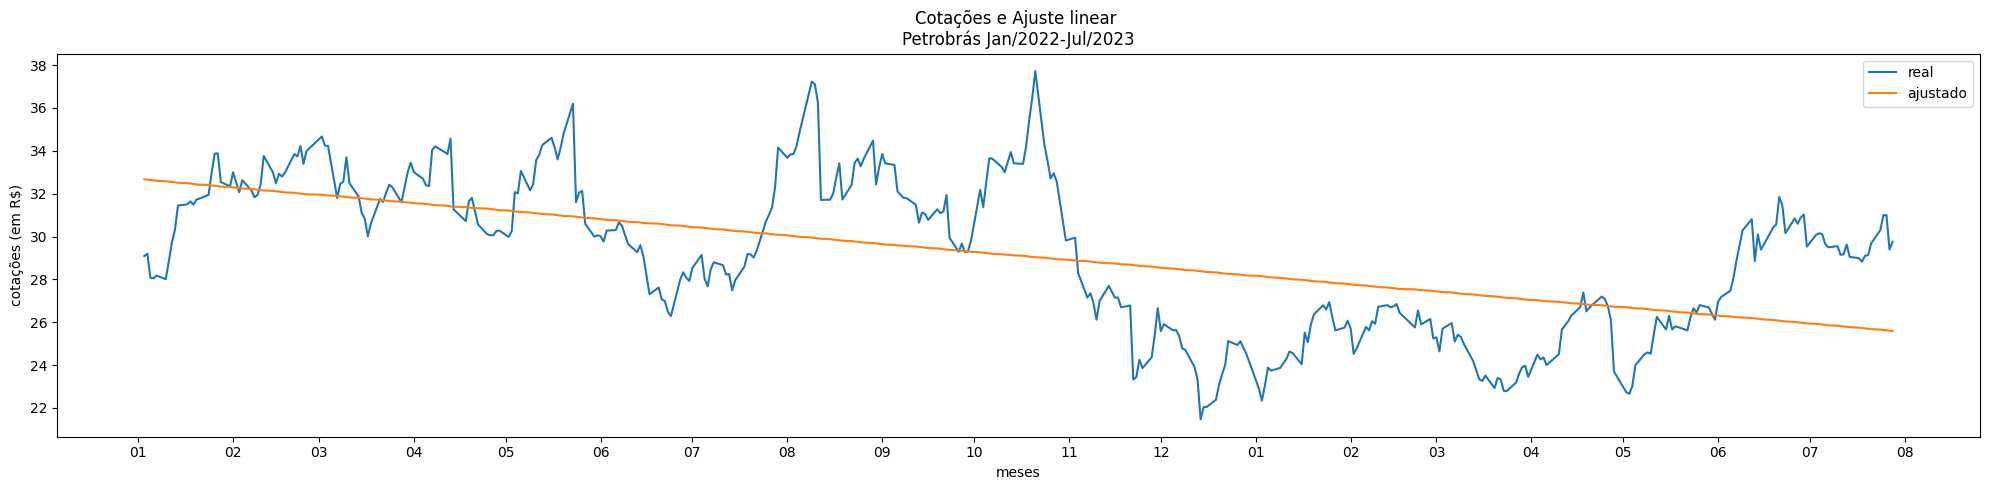

In [ ]:
import matplotlib.dates as mdates
formato = mdates.DateFormatter("%m") ### formatando os dados
local = mdates.MonthLocator() ### localizando os meses

fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.xaxis.set_major_formatter(formato)
ax.xaxis.set_major_locator(local)
plt.plot(dados["Close"])
plt.plot(dados['ajuste_linear'])
plt.title('Cotações e Ajuste linear \nPetrobrás Jan/2022-Jul/2023')
plt.xlabel('meses')
plt.ylabel('cotações (em R$)')
plt.legend(['real','ajustado'])
plt.tight_layout()
plt.show()


### Cálculo do MAPE para o Ajuste Linear

In [ ]:
calculo_mape(dados["Close"], dados["ajuste_linear"])

MAPE = 8.53 %


8.527166201335822

#  <a name="secao_5"> Seção 5 - Análise dos Retornos da série temporal</a>
[Voltar ao índice](#indice)

## Análise dos Retornos da série temporal

A análise dos retornos em uma série temporal é uma metodologia ultilizada em diferentes campos como: economia, finanças dentre outras, a fim de entender os padrões de comportamento e variações ao longo do tempo. Essa abordagem foca na análise das mudanças percentuais entre os valores de uma série, em vez de examinar os próprios valores absolutos. Apresentaremos em seguida suas vantagens e desvantagens, bem como sua aplicação para interpretar grandes variações de crescimento e queda em séries temporais, relacionando esses valores com eventos próximos às datas analisadas.

## Vantagens

1. Eliminação de tendências e a detecção da volatilidade: A análise de retornos ajuda remover tendências de crescimento ou declínio linear da série, permitindo uma melhor compreensão dos movimentos irregulares e volatilidade.
2. Comparação Facilitada: A análise de retornos permite comparar o desempenho de diferentes séries temporais, independentemente de suas escalas originais,
entre outras.

## Desvantagens

1. Sensibilidade aos dados, com valores próximos de zero ou negativos
2. Dificuldade em lidar com dados faltantes
3. Descarte de Informações Absolutas, entre outros.

---
Para explicar as grandes variações de crescimento e queda na série temporal, é essencial correlacionar esses valores com eventos ou acontecimentos próximos as datas analisadas. Alguns passos para realizar essa análise interpretativa incluem:

1. **Identificação de Eventos Relevantes:** Buscar eventos econômicos, políticos, sociais ou externos que possam ter impactado a série em questão, como crises financeiras, mudanças de políticas governamentais, descobertas científicas, entre outros.

2. **Visualização dos Dados:** Plotar os retornos ao longo do tempo e destacar as datas correspondentes às grandes variações. Isso pode ajudar a identificar padrões e comportamentos incomuns.

3. **Análise de Causalidade:** Analisar a relação de causa e efeito entre os eventos identificados e as variações dos retornos. Nem todas as grandes variações serão diretamente explicadas por eventos próximos, mas muitas vezes podem existir correlações.

4. **Análise Conjunta:** Combinar a análise dos retornos com outras variáveis relevantes para verificar a existência de relações de interdependência e possíveis efeitos de "contaminação" entre séries temporais.

5. Utilização de modelos



Para calcular o retorno vamos ultilizar o **RETORNO LOGARÍTMICO**, é apenas uma das formas de calcular, podemos também calcular pelo retorno simples (usando a função **pct_change()** do Pandas), depende do seu dado.

O retorno logarítmico é mais apropriado quando a distribuição dos retornos não é normal ou quando há grandes variações percentuais nos preços entre os períodos. Ele é especialmente útil quando se lida com ativos financeiros, pois possui propriedades matemáticas que facilitam o cálculo de retornos acumulados e a análise de longo prazo.

**Retorno Logarítmico = ln(Preço Atual / Preço Anterior)**

## Implementação


In [ ]:
import numpy as np

def log_retorno(coluna):
  return np.log(coluna / coluna.shift(1))

dados["retorno"] = log_retorno(dados["Close"])
dados.head()

,Open,High,Low,Close,Adj Close,Volume,ajuste_linear,retorno
Date,,,,,,,,
2022-01-03,28.540001,29.219999,28.530001,29.090000,14.200678,52704700,32.673466,NaN
2022-01-04,29.160000,29.400000,28.910000,29.200001,14.254376,51739200,32.655434,0.003774
2022-01-05,29.190001,29.270000,27.940001,28.070000,13.702751,78459800,32.637402,-0.039467
2022-01-06,28.290001,28.650000,27.840000,28.049999,13.692988,61163100,32.619370,-0.000713
2022-01-07,28.110001,28.290001,27.820000,28.180000,13.756451,47507600,32.601338,0.004624


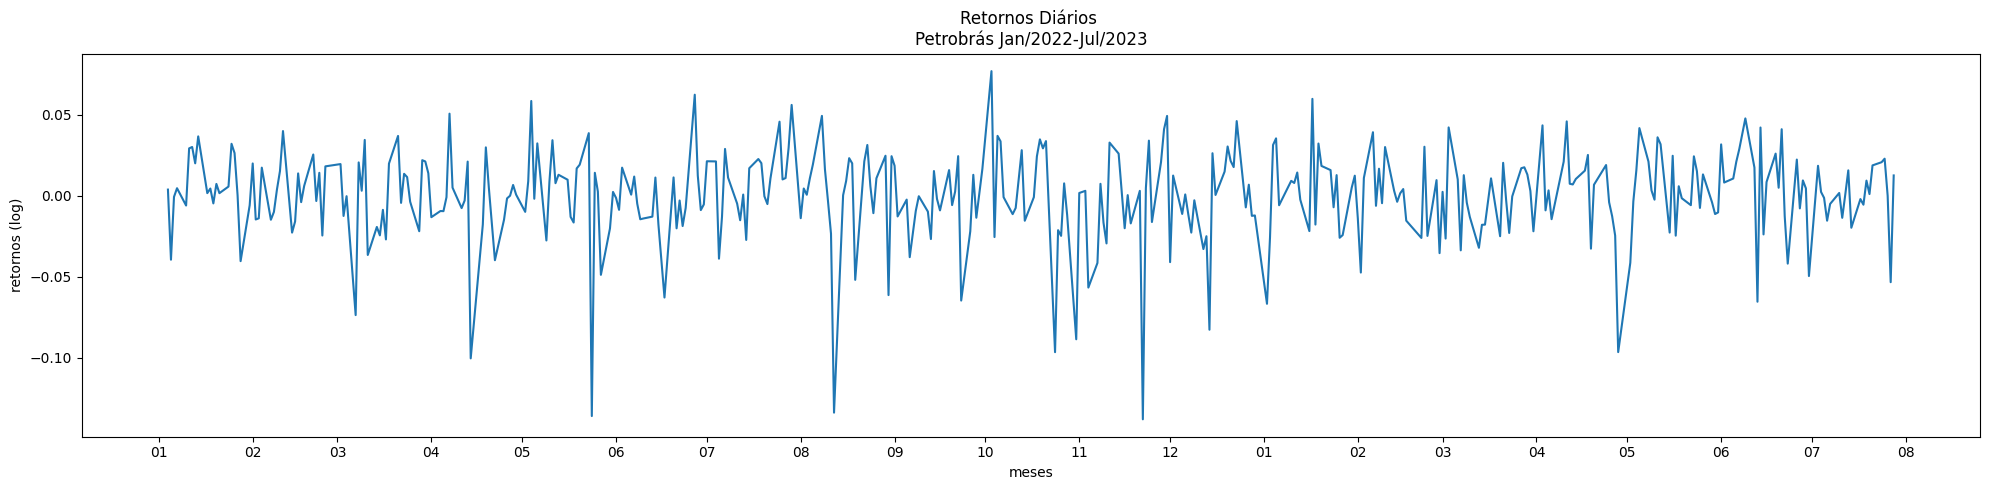

In [ ]:
import matplotlib.dates as mdates
formato = mdates.DateFormatter("%m") ### formatando os dados
local = mdates.MonthLocator() ### localizando os meses

fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.xaxis.set_major_formatter(formato)
ax.xaxis.set_major_locator(local)
plt.plot(dados["retorno"])
plt.title('Retornos Diários \nPetrobrás Jan/2022-Jul/2023')
plt.xlabel('meses')
plt.ylabel('retornos (log)')
plt.tight_layout()
plt.show()

#  <a name="secao_6"> Seção 6 - Ajustamento da série temporal empregando Média Móvel </a>
[Voltar ao índice](#indice)

##Ajustamento por Média Móvel:

O ajustamento por [média móvel](https://pt.wikipedia.org/wiki/Média_móvel) é uma metodologia amplamente utilizada em várias áreas, incluindo estatísticas, finanças, previsão de séries temporais e análise de dados. É uma técnica que visa suavizar os dados, reduzir o impacto de variações aleatórias e destacar tendências subjacentes. Neste texto, exploraremos o conceito dessa metodologia, suas vantagens e desvantagens, bem como apresentaremos uma função que pode ser aplicada para avaliar ajustamentos por média móvel.

A fórmula da média móvel é representada como:

$$\text{SMA} = \frac{1}{n} \sum_{i=1}^{n} x_i$$
Onde:

$x_i$ é o valor do elemento na posição $i$ na série de dados;

$n$ é o número de elementos considerados para o cálculo da média móvel.

###Vantagens:

*   **Suavização de Ruído:** O ajustamento por média móvel é eficaz na redução do ruído e flutuações de curto prazo nos dados, permitindo uma visão mais clara das tendências subjacentes;

*   **Identificação de Tendências:** A técnica ajuda a destacar padrões de longo prazo, tornando mais fácil a identificação de tendências significativas nos dados;

*   **Previsão de Séries Temporais:** A média móvel pode ser usada para prever valores futuros, pois reflete melhor os padrões subjacentes, tornando as previsões mais precisas;

*   **Simplicidade:** A metodologia é relativamente simples de entender e implementar, sendo uma boa opção para análises iniciais.

###Desvantagens:

*   **Atraso nas Respostas:** Como a técnica suaviza os dados, pode haver um atraso na detecção de mudanças repentinas ou eventos inesperados;

*   **Menos Sensibilidade a Variações:** Médias móveis podem reduzir a sensibilidade a variações importantes nos dados, o que pode levar a uma perda de informações detalhadas;

*   **Dependência do Parâmetro:** A eficácia da média móvel depende do tamanho do intervalo utilizado. Escolher um intervalo inadequado pode resultar em uma suavização excessiva ou insuficiente;

*   **Não Considera Padrões Complexos:** Para séries temporais com padrões complexos, a média móvel pode não ser suficientemente robusta para capturar todas as nuances.

O ajustamento por média móvel é uma técnica valiosa para suavização de dados e identificação de tendências em séries temporais. No entanto, é importante considerar suas vantagens e desvantagens antes de aplicá-la, especialmente em situações onde a sensibilidade aos detalhes e mudanças rápidas é crucial.

## Implementação:

In [ ]:
def media_movel(lista, janela):
    '''Esta função calcula a média móvel de uma lista dada uma janela definida pelo usuário'''
    # Índice inicial
    i = 0
    # Lista para armazenar as médias móveis
    medias_moveis = []
    # Laço for para percorrer a lista de preços
    # Laço while para percorrer a lista de preços
    while i < len(lista):
    # Verificar se i é menor que a janela
        if i < janela:
            media = None
        else:
            # Somar os valores do intervalo [i-janela, i]
            soma = sum(lista[i-janela+1:i+1])
            # Dividir pela janela
            media = soma / janela
        # Adicionar à lista de médias móveis
        medias_moveis.append(media)
        # Incrementar o índice
        i += 1
    return medias_moveis

In [ ]:
dados['mm_ajust'] = media_movel(dados["Close"], 5)

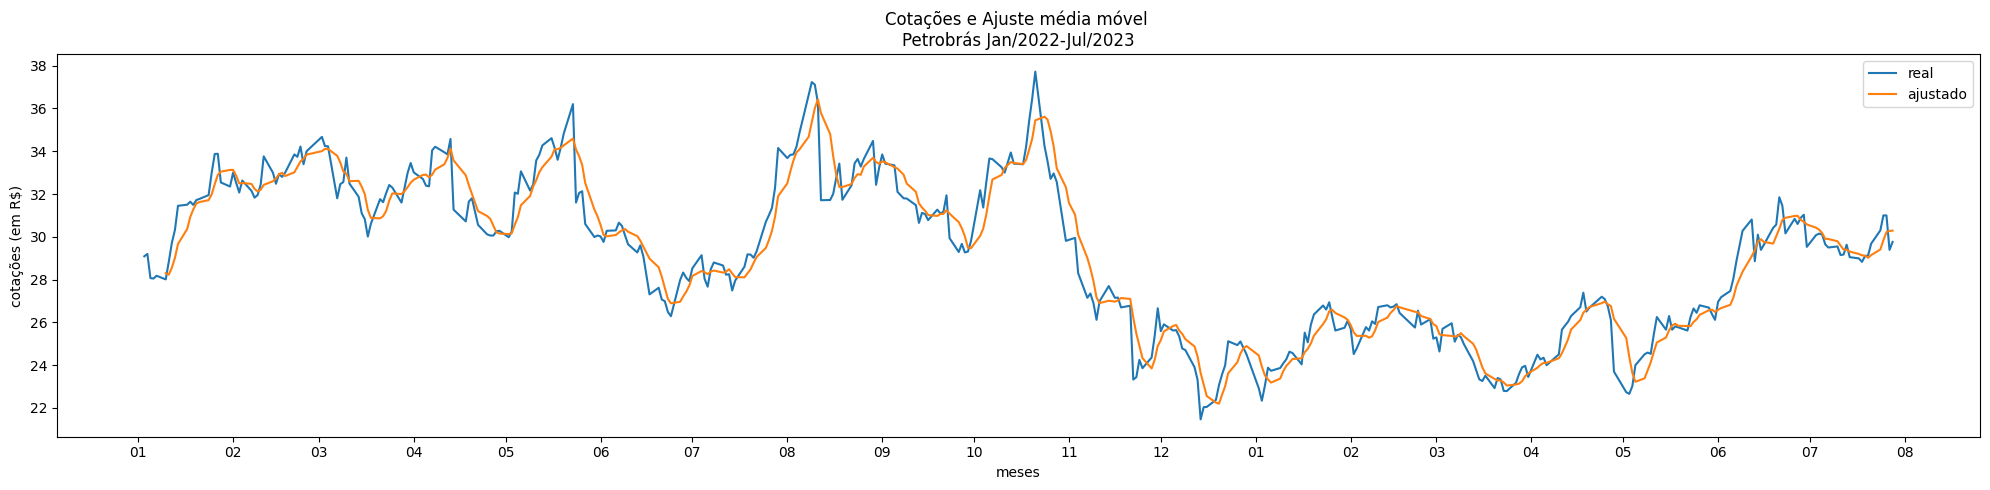

In [ ]:
import matplotlib.dates as mdates
formato = mdates.DateFormatter("%m") ### formatando os dados
local = mdates.MonthLocator() ### localizando os meses

fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.xaxis.set_major_formatter(formato)
ax.xaxis.set_major_locator(local)
plt.plot(dados["Close"])
plt.plot(dados['mm_ajust'])
plt.title('Cotações e Ajuste média móvel \nPetrobrás Jan/2022-Jul/2023')
plt.xlabel('meses')
plt.ylabel('cotações (em R$)')
plt.legend(['real','ajustado'])
plt.tight_layout()
plt.show()

### Cálculo do Mape para ajustamento por média móvel

In [ ]:
mape = calculo_mape(dados["Close"], dados['mm_ajust'])

MAPE = 2.38 %


#  <a name="secao_7"> Seção 7 -  Ajustamento da série temporal empregando Média Móvel Ponderada</a>
[Voltar ao índice](#indice)

### Fórmulas a serem utilizadas na implementação do modelo de médias móveis com ponderação linear.

\$$\frac{(X_n * P_1) + (X_{n-1} * P_2) + (X_{n-2} * P_3)...}{\sum P}$$

onde:

- \($X_i$) São os valores observados.
- \($P_i$) São os pesos estimados pela ponderação linear entre o **n** primeiros valores do período considerado.

A Média Móvel com Ponderação Linear é uma média móvel simples que coloca mais peso nos dados recentes. A observação mais recente tem o maior peso e cada uma anterior a ela tem um peso progressivamente decrescente. Isso significa que valores mais recentes têm um impacto maior na média do que valores mais antigos.

### Vantagens

1. **Sensibilidade a Mudanças Recentes:** A média móvel ponderada dá mais importância aos valores mais recentes, permitindo capturar mudanças ou tendências mais recentes na série temporal.

2. **Suavização de Ruídos:** Ao atribuir pesos, a técnica ajuda a suavizar flutuações e ruídos nos dados, tornando mais fácil identificar tendências subjacentes.

3. **Adequação a Padrões Variáveis:** Como os pesos podem ser ajustados, a média móvel ponderada é flexível para se adequar a diferentes padrões e comportamentos das séries temporais.

### Desvantagens:

1. **Perda de Informação Passada:** Como os valores mais antigos recebem menos peso, informações relevantes do passado podem ser perdidas, o que pode ser problemático em certos cenários.

2. **Atraso na Detecção de Mudanças:** Devido à ênfase nos valores recentes, a média móvel ponderada pode ter um atraso na detecção de mudanças abruptas ou repentinas na série temporal.

3. **Necessidade de Escolher Pesos Adequados:** A determinação dos pesos requer alguma intuição ou análise prévia, o que pode ser subjetivo e levar a resultados imprecisos se os pesos forem escolhidos de forma inadequada.

**Exemplos de Aplicação:**

1. **Economia e Finanças:** Na análise de ações, a média móvel ponderada pode ser usada para identificar tendências de preços, suavizando flutuações diárias e destacando movimentos de longo prazo.

2. **Previsão de Vendas:** Em empresas que vendem produtos sazonais, a técnica pode ajudar a prever a demanda futura, considerando a influência de vendas recentes e passadas.

3. **Meteorologia:** Ao analisar dados climáticos ao longo do tempo, a média móvel ponderada pode destacar padrões sazonais, como mudanças de temperatura ao longo das estações.

4. **Tráfego e Transporte:** Na análise de fluxos de tráfego, essa técnica pode auxiliar na identificação de tendências de congestionamento ao longo do tempo.

### Implementação

In [ ]:
import numpy as np
import pandas as pd

def mediaMovelPondLinear(dados, periodo):
    ponderacao = []
    for i in range(len(dados)):
        if i >= periodo - 1:  # Verificar se há pontos de dados suficientes para o cálculo
            total = np.arange(1, periodo + 1, 1)  # matriz de pesos

            matriz = dados.iloc[i - periodo + 1: i + 1]  # Extrair o período relevante
            matriz = total * matriz  # Multiplicar dados pelos pesos
            mmp = matriz.sum() / total.sum()  # Calcular a Média Móvel Ponderada Linear
            ponderacao.append(mmp)  # Adicionar ao array
    for i in range(len(dados) - len(ponderacao)):
        if len(ponderacao) < len(dados):
            ponderacao.append(None)
    return ponderacao

In [ ]:
dados['mmp_ajust'] = mediaMovelPondLinear(dados["Close"], 3)
dados.tail()

,Open,High,Low,Close,Adj Close,Volume,ajuste_linear,retorno,mm_ajust,mmp_ajust
Date,,,,,,,,,,
2023-07-24,29.799999,30.410000,29.760000,30.299999,30.299999,45268100,25.658967,0.020674,29.408,30.883333
2023-07-25,30.500000,31.049999,30.200001,31.000000,31.000000,56261000,25.640935,0.022840,29.842,30.195000
2023-07-26,30.950001,31.219999,30.629999,31.000000,31.000000,45880200,25.622903,0.000000,30.222,29.843333
2023-07-27,30.850000,30.889999,29.379999,29.389999,29.389999,86471900,25.604870,-0.053333,30.274,NaN
2023-07-28,29.430000,29.950001,29.320000,29.760000,29.760000,43608600,25.586838,0.012511,30.290,NaN


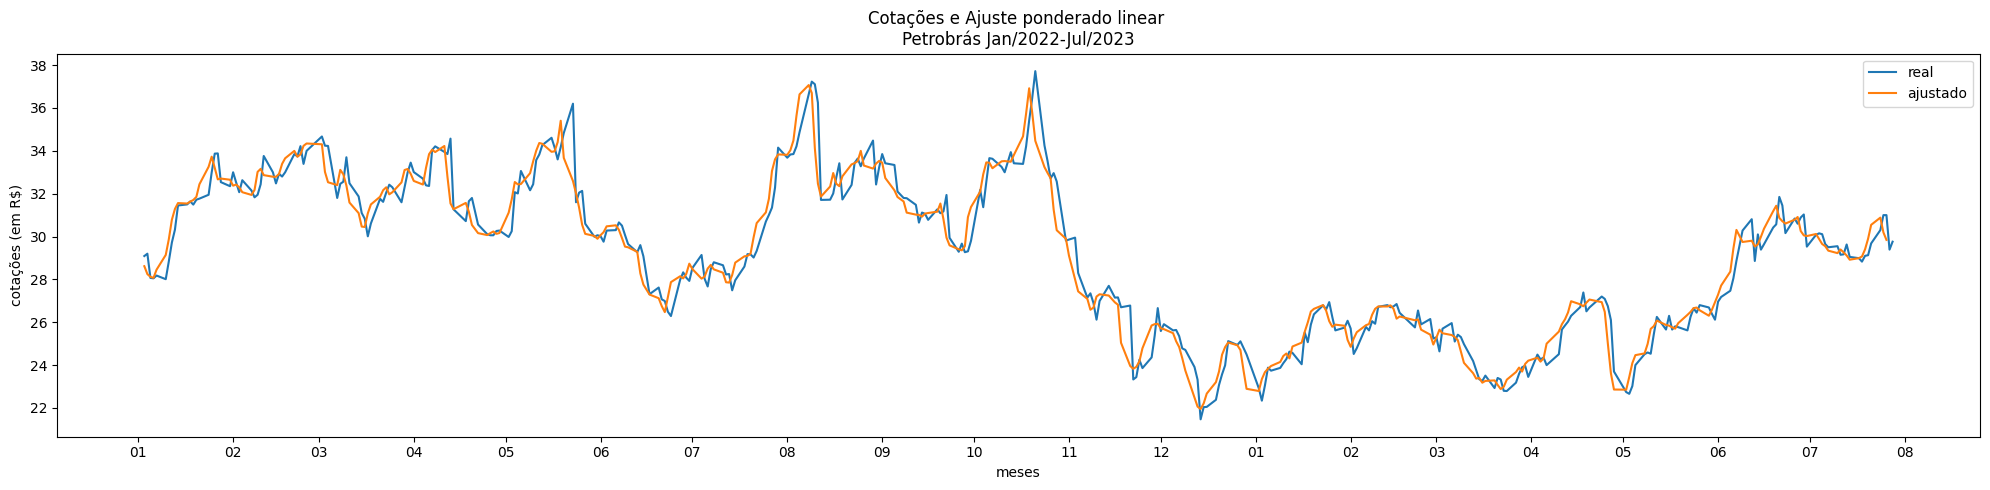

In [ ]:
import matplotlib.dates as mdates
formato = mdates.DateFormatter("%m") ### formatando os dados
local = mdates.MonthLocator() ### localizando os meses

fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.xaxis.set_major_formatter(formato)
ax.xaxis.set_major_locator(local)
plt.plot(dados["Close"])
plt.plot(dados['mmp_ajust'])
plt.title('Cotações e Ajuste ponderado linear \nPetrobrás Jan/2022-Jul/2023')
plt.xlabel('meses')
plt.ylabel('cotações (em R$)')
plt.legend(['real','ajustado'])
plt.tight_layout()
plt.show()

### Cálculo do MAPE para ajustamento por Média Móvel Ponderada

In [ ]:
calculo_mape(dados["Close"], dados["mmp_ajust"])

MAPE = 2.03 %


2.034221718407122

#  <a name="secao_8"> Seção 8 - Ajustamento da série temporal empregando Splines</a>
[Voltar ao índice](#indice)

### Fórmulas a serem utilizadas para implementação do modelo Spline Cúbica

A spline cúbica é definida como uma função polinomial cúbica em cada intervalo entre nós. A função geral de uma spline cúbica entre dois nós \($x_i$\) e \($x_{i+1}$\) é dada por:

\$$S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3$$ \

Onde:
- \( $a_i$ \), \( $b_i$ \), \( $c_i$ \) e \( $d_i$ \) são coeficientes a serem determinados para cada intervalo.
- \( $x_i$ \) e \( $x_{i+1}$ \) são os nós adjacentes.

As splines cúbicas são contínuas em seus pontos nodais e também têm continuidade na primeira e segunda derivadas nos nós internos, o que as torna suaves e adequadas para ajustar curvas complexas.

Dentro de cada intervalo entre dois nós adjacentes, os coeficientes \($a_i$\), \($b_i$\), \($c_i$\) e \($d_i$\) são determinados a partir de condições adicionais para garantir a suavidade da curva. Essas condições normalmente são baseadas em exigências de continuidade e suavidade nas extremidades dos intervalos.

Pelas caracteríscas apresentadas o ajustamento por splines cúbicos se aplica bem na modelagem de curvas de crescimento em estudos longitudinais,
como o que estamos apresentando nesse trabalho. Outra aplicação comum é na análise de dados financeiros, onde o ajustamento por splines cúbicos pode ser usado para suavizar curvas de preços e taxas de juros.

## Vantagens

1. Permite obter uma função contínua e diferenciável a partir de dados discretos, o que pode ser útil em diversas aplicações.
2. Capacidade de se ajustar a dados com alta variabilidade, produzindo uma curva suave que passa pelos pontos dados.

## Desvantagens

1. Pode ser sensível a **outliers**, ou seja, pontos discrepantes que estão muito distantes dos demais.
2. Pode produzir curvas com oscilações indesejadas quando os dados são muito ruidosos.

3. Pode gerar um **superajustamento**, ou **overfitting**. Esse é um problema que pode ocorrer quando um modelo é ajustado de forma muito precisa aos dados de treinamento, mas não generaliza bem para novos dados.

Isso pode acontecer com o ajustamento por splines cúbicos se o número de nós (ou pontos de controle) for muito grande em relação ao número de observações. Nesse caso, a curva ajustada pode se ajustar perfeitamente aos dados de treinamento, mas pode não representar bem a relação subjacente entre as variáveis.

Um exemplo de como o superajustamento pode ser prejudicial é na previsão de séries temporais. Se um modelo é superajustado aos dados históricos, ele pode não ser capaz de prever corretamente os valores futuros da série, pois está capturando o ruído presente nos dados em vez da tendência subjacente. Isso pode levar a previsões imprecisas e a decisões equivocadas baseadas nessas previsões.

Constatamos esse problema no exemplo que apresentaremos abaixo. Não implantaremos nenhuma correção nesse momento porém a literatura indica que para evitar o superajustamento ao usar splines cúbicos, é importante escolher cuidadosamente o número de nós e sua localização. Uma abordagem comum é usar validação cruzada para selecionar o número ótimo de nós que minimiza o erro de previsão em um conjunto de validação. Além disso, é possível usar técnicas de regularização para controlar a complexidade do modelo e evitar o superajustamento.

## Implementação

In [ ]:
import numpy as np

def spline(x, y):
	""" Retorna todos os coeficientes de todos os polinômios,
	out seja, todos os ak, bk, ck e dk """
	n = len(x)
	a = {k: v for k, v in enumerate(y)}
	h = {k: x[k+1] - x[k] for k in range(len(x)-1)}
	A = [[1] + [0]*(n-1)]
	for i in range(1, n-1):
		linha = [0] * n
		linha[i-1] = h[i - 1]
		linha[i] = 2*(h[i-1] + h[i])
		linha[i + 1] = h[i]
		A.append(linha)
	A.append([0]*(n-1) + [1])

	B = [0]
	for i in range(1, n-1):
		linha = 3 * (a[i+1] - a[i]) / h[i] - 3 * (a[i] - a[i-1]) / h[i-1]
		B.append(linha)
	B.append(0)
	c = dict(zip(range(n), np.linalg.solve(A, B)))
	b = {}
	d = {}
	for i in range(n - 1):
		b[i] = (1/h[i]) * (a[i + 1] - a[i]) - (h[i]/3) * (2*c[i] + c[i + 1])
		d[i] = (c[i + 1] - c[i])/(3*h[i])
	s = {}
	for i in range(n-1):
		eq = f'{a[i]}{b[i]:+}*(x-{x[i]}){c[i]:+}*(x-{x[i]})**2{d[i]:+}*(x-{x[i]})**3'
		s[i] = {'eq': eq, 'dominio': [x[i], x[i+1]]}
	return s

In [ ]:
eqs = spline(range(len(dados)), dados["Close"])

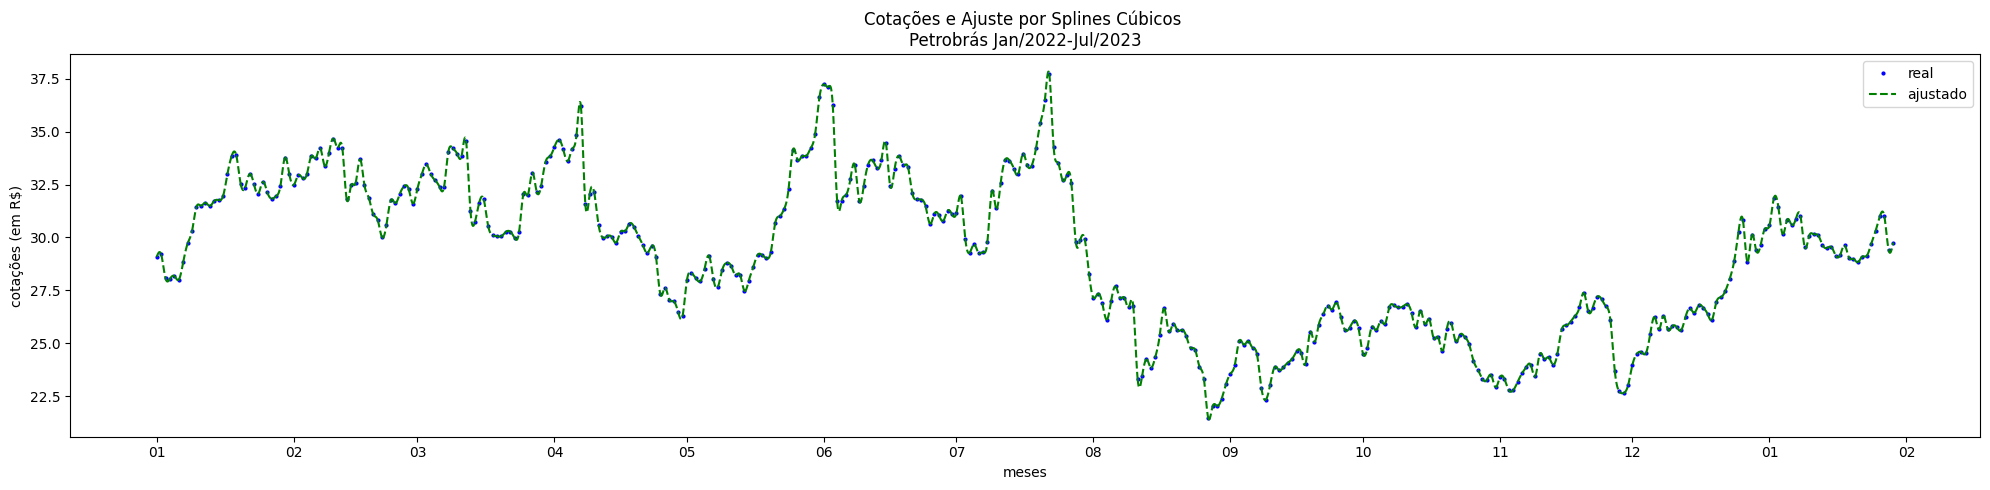

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
formato = mdates.DateFormatter("%m") ### formatando os dados
local = mdates.MonthLocator() ### localizando os meses
fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.xaxis.set_major_formatter(formato)
ax.xaxis.set_major_locator(local)
plt.plot(range(len(dados)), dados["Close"], 'bo', markersize=2)
for key, value in eqs.items():
	def p(x):
		return eval(value['eq'])
	t = np.linspace(*value['dominio'], 10)
	plt.plot(t, p(t), color='green', linestyle='dashed', markersize = 1)
plt.title('Cotações e Ajuste por Splines Cúbicos \nPetrobrás Jan/2022-Jul/2023')
plt.xlabel('meses')
plt.ylabel('cotações (em R$)')
plt.legend(['real','ajustado'])
plt.tight_layout()
plt.show()



### Interpolação usando o Método CubicSpline da Biblioteca Scipy Interpolate

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
cs = CubicSpline(dados.index.values ,dados['Close'])
dados['Spline_Cubic_Scipy'] = cs(dados.index.values)

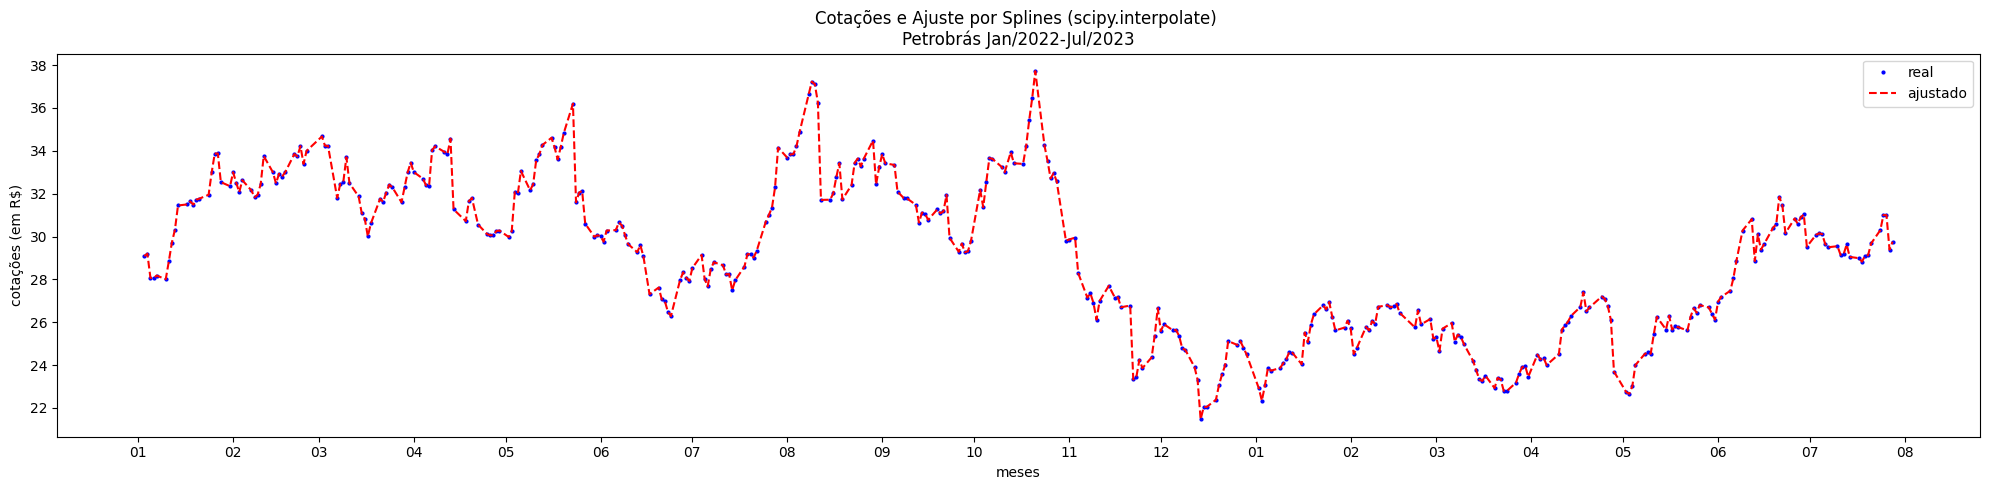

In [ ]:
import matplotlib.dates as mdates
formato = mdates.DateFormatter("%m") ### formatando os dados
local = mdates.MonthLocator() ### localizando os meses

fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.xaxis.set_major_formatter(formato)
ax.xaxis.set_major_locator(local)
plt.plot(dados["Close"], 'bo', markersize=2)
plt.plot(dados['Spline_Cubic_Scipy'], 'r--')
plt.title('Cotações e Ajuste por Splines (scipy.interpolate) \nPetrobrás Jan/2022-Jul/2023')
plt.xlabel('meses')
plt.ylabel('cotações (em R$)')
plt.legend(['real','ajustado'])
plt.tight_layout()
plt.show()

### Cálculo do MAPE para ajuste por Splines Cúbicos

In [ ]:
calculo_mape(dados["Close"], dados["Spline_Cubic_Scipy"])

MAPE = 0.00 %


0.0

#  <a name="secao_9"> Seção 9 - Ajustamento da série temporal empregando Suavização Exponencial Simples</a>
[Voltar ao índice](#indice)

Fórmulas a serem utilizadas na implementação do método de Suavização Exponencial Simples (SES).

1. **Suavização Exponencial Simples (SES)**:
\$S_t = \alpha \times X_t + (1 - \alpha) \times S_{t-1}$ \

Onde:
- \( $S_t$ \) é o valor suavizado (previsão) na etapa \( $t$ \).
- \( $Y_t$ \) é o valor observado (real) na etapa \( $t$ \).
- \( $S_{t-1}$ \) é o valor suavizado (previsão) na etapa anterior \( $t-1$ \).
- \( $\alpha$ \) é o parâmetro de suavização, que controla o peso exponencial atribuído à observação atual em relação ao valor suavizado anterior.

2. **Erro Quadrático Médio (MSE)**:
\$MSE = \frac{1}{n} \sum_{t=1}^{n} (X_t - S_t)^2$ \

Onde:
- \( $n$ \) é o número de pontos na série temporal.
- \( $X_t$ \) é o valor observado (real) na etapa \( $t$ \).
- \( $S_t$ \) é o valor suavizado (previsão) na etapa \( $t$ \).

3. **Minimização do MSE**:
\$\text{Encontrar } \alpha^* = \underset{\alpha \in [0,1]}{\arg \min} \left( \frac{1}{n} \sum_{t=1}^{n} (Y_t - S_t)^2 \right)$ \

Onde:
- \( $\alpha^*$ \) é o valor ótimo de \( $\alpha$ \) que minimiza o MSE entre os dados observados e os valores suavizados usando o método de Suavização Exponencial Simples.

Essas fórmulas são usadas na implementação do método de Suavização Exponencial Simples com otimização do MSE para encontrar o valor ótimo de \( $\alpha$ \) que proporciona a melhor suavização dos dados fornecidos. Para o cálculo do \( $\alpha^*$ \) empregaremos o método **minimize_scalar** da biblioteca **scipy.optimize**.

A suavização exponencial simples é um método de previsão de séries temporais que utiliza uma média ponderada dos valores passados para prever o valor futuro. Ele é útil quando a série temporal não apresenta tendência ou sazonalidade clara e é caracterizada por flutuações aleatórias em torno de uma média constante.

Um exemplo de aplicação da suavização exponencial simples é na previsão de demanda de produtos ou serviços. Esse método pode ser usado para estimar a demanda futura com base no histórico de vendas, atribuindo maior peso aos valores mais recentes. Outra aplicação comum é na análise de dados financeiros, onde a suavização exponencial simples pode ser usada para suavizar curvas de preços e taxas de juros.

## Vantagens

1. Facilidade de implementação e de entendimento.
2. Capacidade de se ajustar rapidamente a mudanças na média da série temporal, o que pode ser útil em situações em que a média muda frequentemente.
3. Produz previsões suaves, sem grandes oscilações, o que pode ser desejável em algumas aplicações.

## Desvantagens

1. Pode não ser capaz de capturar tendências ou sazonalidade na série temporal. Isso significa que ela pode produzir previsões imprecisas quando a série temporal apresenta essas características.
2. A escolha do parâmetro de suavização, que determina o peso atribuído aos valores passados, pode ser subjetiva e pode afetar significativamente a qualidade das previsões.

Nesse trabalho a escolha do parâmetro de suavização empregamos uma metodologia que minimizasse o erro quadrático médio o que nos levou novamente ao fenômeno de superajustamento (overfitting) dos dados, trazendo as mesmas consequencias observadas no ajustamento por splines cúbicos. A literatura tem recomendado a aplicação de ajustamento por suavização exponencial dupla ou tripla e uma escolha adequada do parâmetro de ajustamento como estratégias para contornar esse tipo de problema. Constatamos assim que a sensibilidade de um bom analista pode contribuir para a escolha do melhor modelo a ser utilizado.

## Implementação

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar

def suavizacao_exponencial_simples(data, alpha):
    dados_suavizados = [data.iloc[0]]

    for i in range(1, len(data)):
        valor_suavizado = alpha * data.iloc[i] + (1 - alpha) * dados_suavizados[i - 1]
        dados_suavizados.append(valor_suavizado)

    return np.array(dados_suavizados)

def melhor_alpha(data):
    def erro_quadr_medio(y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    def funcao_erro(alpha):
        dados_suavizados = suavizacao_exponencial_simples(data, alpha)
        return erro_quadr_medio(data.values, dados_suavizados)

    sol = minimize_scalar(funcao_erro, bounds=(0, 1), method='bounded')
    melhor_alpha = sol.x
    return melhor_alpha

In [ ]:
dados["ajuste_exp"] = suavizacao_exponencial_simples(dados["Close"], melhor_alpha(dados["Close"]))

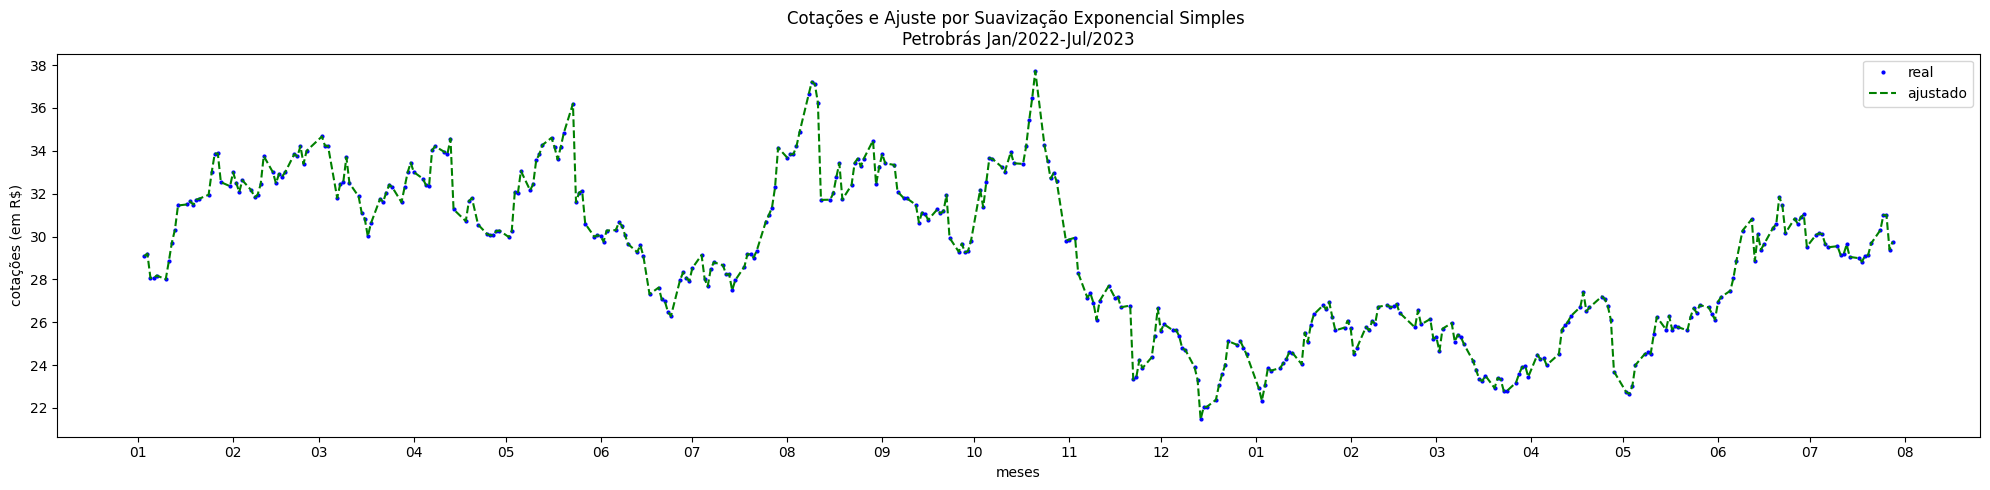

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
formato = mdates.DateFormatter("%m") ### formatando os dados
local = mdates.MonthLocator() ### localizando os meses

fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.xaxis.set_major_formatter(formato)
ax.xaxis.set_major_locator(local)
plt.plot(dados["Close"], 'bo', markersize=2)
plt.plot(dados['ajuste_exp'], color = 'green', linestyle = '--')
plt.title('Cotações e Ajuste por Suavização Exponencial Simples \nPetrobrás Jan/2022-Jul/2023')
plt.xlabel('meses')
plt.ylabel('cotações (em R$)')
plt.legend(['real','ajustado'])
plt.tight_layout()
plt.show()

### Cálculo do MAPE para ajustamento exponencial Simples

In [ ]:
calculo_mape(dados["Close"], dados["ajuste_exp"])

MAPE = 0.00 %


7.4788394260823595e-06

#  <a name="conclusao"> Conclusão </a>
[Voltar ao índice](#indice)

### Resultados do MAPE para os Modelos Aplicados

|Modelo                 |MAPE   |
|-----------------------|:------|
|Linear                 |8,53%  |
|Média Móvel            |2,38%  |
|Média Móvel Ponderada  |2,03%  |
|Splines Cúbicos        |0,00%* |
|Exponencial Simples    |0,00%  |
*Valores previstos em cada ponto são iguais por definição.

Todos os modelos tiveram erros médios percentuais abaixo de 10% indicando que os ajustes podem representar relativamente bem o fenômeno estudado, ou seja, a variação dos preços de fechamento das ações da Petrobras no período.
Embora os modelos ajustados por Splines Cúbicos e por Exponencial Simples terem sido os que melhor se ajustaram aos dados reais, acredita-se que nesses dois casos ocorreu um fenômeno do superajustamento (**overfitting**), ou seja, um modelo forte no ajustamento porém fraco para previsão.
Pela simplicidade na implementação e pelo resultado obtido acreditamos que o ajuste por média móvel é o se mostrou mais adequado. Lembrando que um ajustamento adequado do passado não garante acurária de 100% para os resultados futuros.
As técnicas permitem sim criar um balisador para tomada de decisão, porém o conhecimento e atenção do investidor pode garantir melhores resultados para seus investimentos.
Esperamos ter podido contribuir com o conhecimento dos leitores.
